# DA Final project:

## Group 15

# Electric vehicles in Washington

### Name of students:  
### Mor zadik 
### Hannah Cohen 

<a id='top'></a>

<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%A8%D7%9B%D7%91-%D7%97%D7%A9%D7%9E%D7%9C%D7%99-1.jpg?raw=true" width="800"/>
</div>

## Links:
### Kaggle : https://www.kaggle.com/datasets/jainaru/electric-vehicle-population
### Provenance : https://catalog.data.gov/dataset/electric-vehicle-population-data
### Github : https://github.com/morzadik/morzadik/tree/main


## Import Libraries :

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

## Load Dataset :

In [2]:
df_part1 = pd.read_csv('https://raw.githubusercontent.com/morzadik/morzadik/main/Electric_Vehicle_Part1.csv')
df_part2 = pd.read_csv('https://raw.githubusercontent.com/morzadik/morzadik/main/Electric_Vehicle_Part2.csv')

df_combined = pd.concat([df_part1, df_part2])
ev_data = df_combined 

## Explore The Data :

In [3]:
ev_data.head()

VIN (1-10)    County     City State  Postal Code  Model Year   Make  \
0  WAUTPBFF4H      King  Seattle    WA      98126.0        2017   AUDI   
1  WAUUPBFF2J  Thurston  Olympia    WA      98502.0        2018   AUDI   
2  5YJSA1E22H  Thurston    Lacey    WA      98516.0        2017  TESLA   
3  1C4JJXP62M  Thurston   Tenino    WA      98589.0        2021   JEEP   
4  5YJ3E1EC9L    Yakima   Yakima    WA      98902.0        2020  TESLA   

      Model                   Electric Vehicle Type  \
0        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
1        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
2   MODEL S          Battery Electric Vehicle (BEV)   
3  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
4   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              16   
1             Not eligible due to low battery range              16   
2           Clean Alternative Fuel Vehicle Eligible             210   
3             Not eligible due to low battery range              25   
4           Clean Alternative Fuel Vehicle Eligible             308   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  34.0       235085336   
1          0                  22.0       237896795   
2          0                  22.0       154498865   
3          0                  20.0       154525493   
4          0                  14.0       225996361   

                 Vehicle Location  \
0    POINT (-122.374105 47.54468)   
1   POINT (-122.943445 47.059252)   
2    POINT (-122.78083 47.083975)   
3    POINT (-122.85403 46.856085)   
4  POINT (-120.524012 46.5973939)   

                               Electric Utility  2020 Census Tract  
0  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                        PUGET SOUND ENERGY INC       5.306701e+10  
2                        PUGET SOUND ENERGY INC       5.306701e+10  
3                        PUGET SOUND ENERGY INC       5.306701e+10  
4                                    PACIFICORP       5.307700e+10

In [4]:
ev_data.shape

(181458, 17)

In [5]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
ev_data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [7]:
missing_values = ev_data.isna().sum()
zero_values = (ev_data == 0).sum()

missing_and_zero_values = pd.DataFrame({'Missing Values': missing_values,'Zero Values': zero_values})
result = missing_and_zero_values[(missing_and_zero_values['Missing Values'] > 0) | (missing_and_zero_values['Zero Values'] > 0)]
result

Missing Values  Zero Values
County                             3            0
City                               3            0
Postal Code                        3            0
Electric Range                     0        94730
Base MSRP                          0       178146
Legislative District             398            0
Vehicle Location                   8            0
Electric Utility                   3            0
2020 Census Tract                  3            0

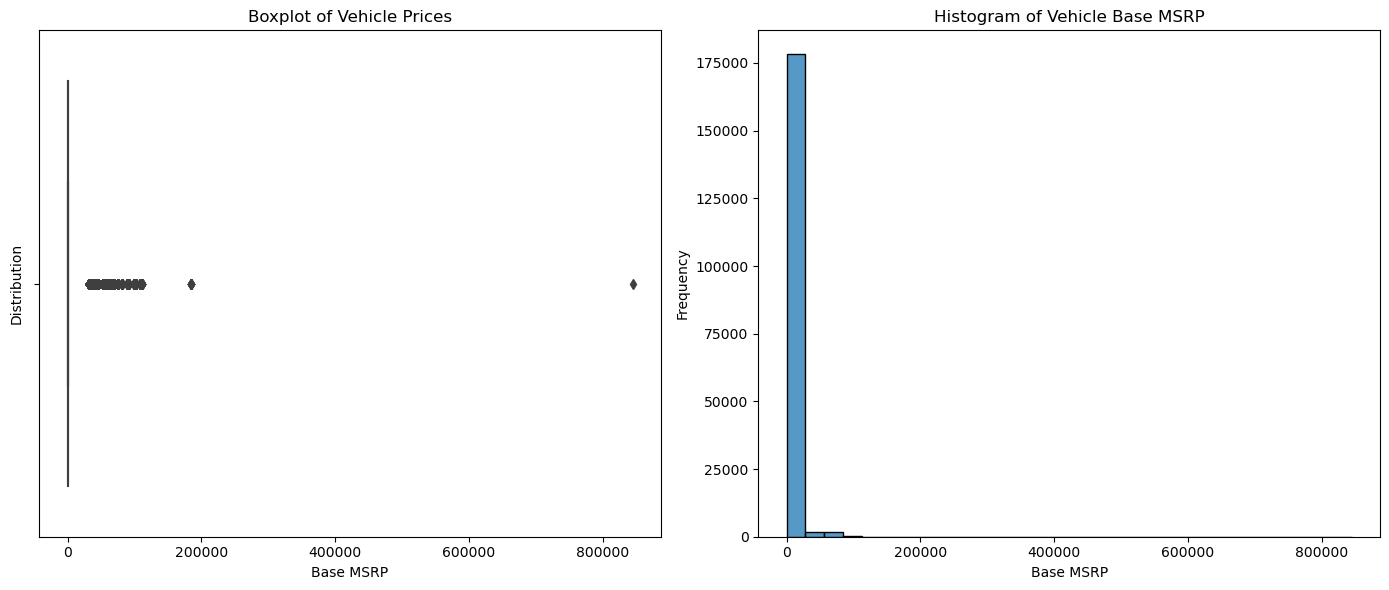

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='Base MSRP', data=ev_data)
axes[0].set_title('Boxplot of Vehicle Prices')
axes[0].set_xlabel('Base MSRP')
axes[0].set_ylabel('Distribution')

sns.histplot(ax=axes[1], x='Base MSRP', data=ev_data, kde=False, bins=30)
axes[1].set_title('Histogram of Vehicle Base MSRP')
axes[1].set_xlabel('Base MSRP')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

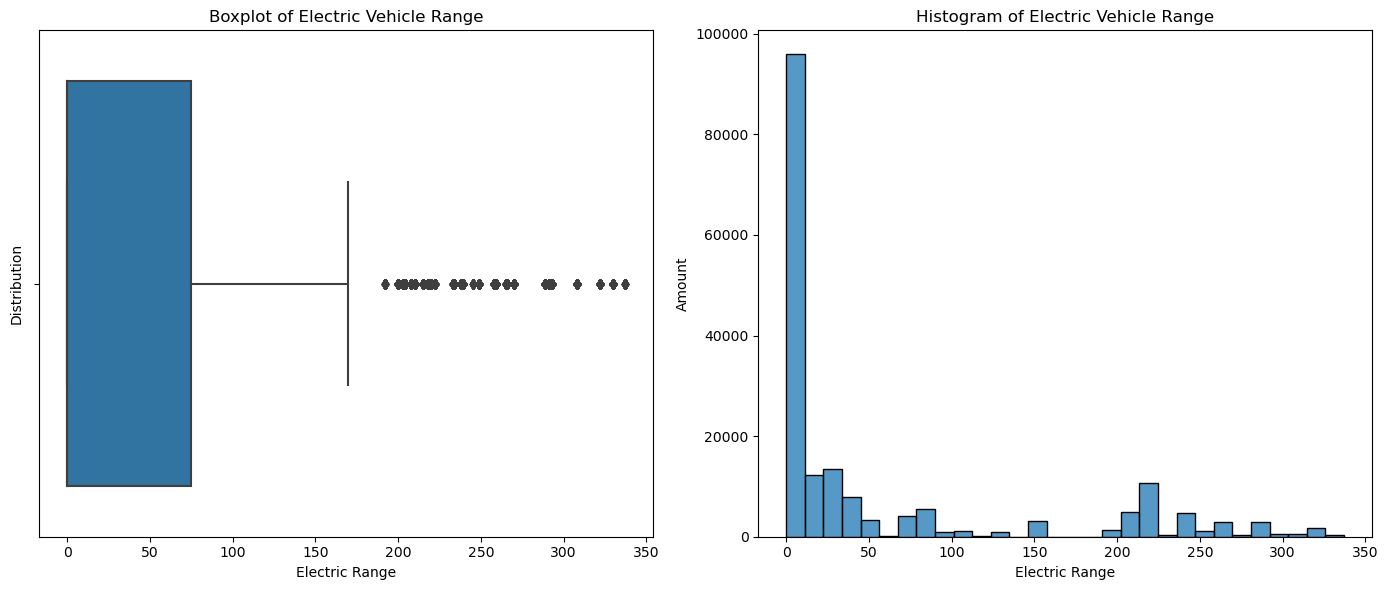

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='Electric Range', data=ev_data)
axes[0].set_title('Boxplot of Electric Vehicle Range')
axes[0].set_xlabel('Electric Range')
axes[0].set_ylabel('Distribution')

sns.histplot(ax=axes[1], x='Electric Range', data=ev_data, kde=False, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Electric Vehicle Range')
axes[1].set_xlabel('Electric Range')
axes[1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

## רקע כללי על הדאטא:

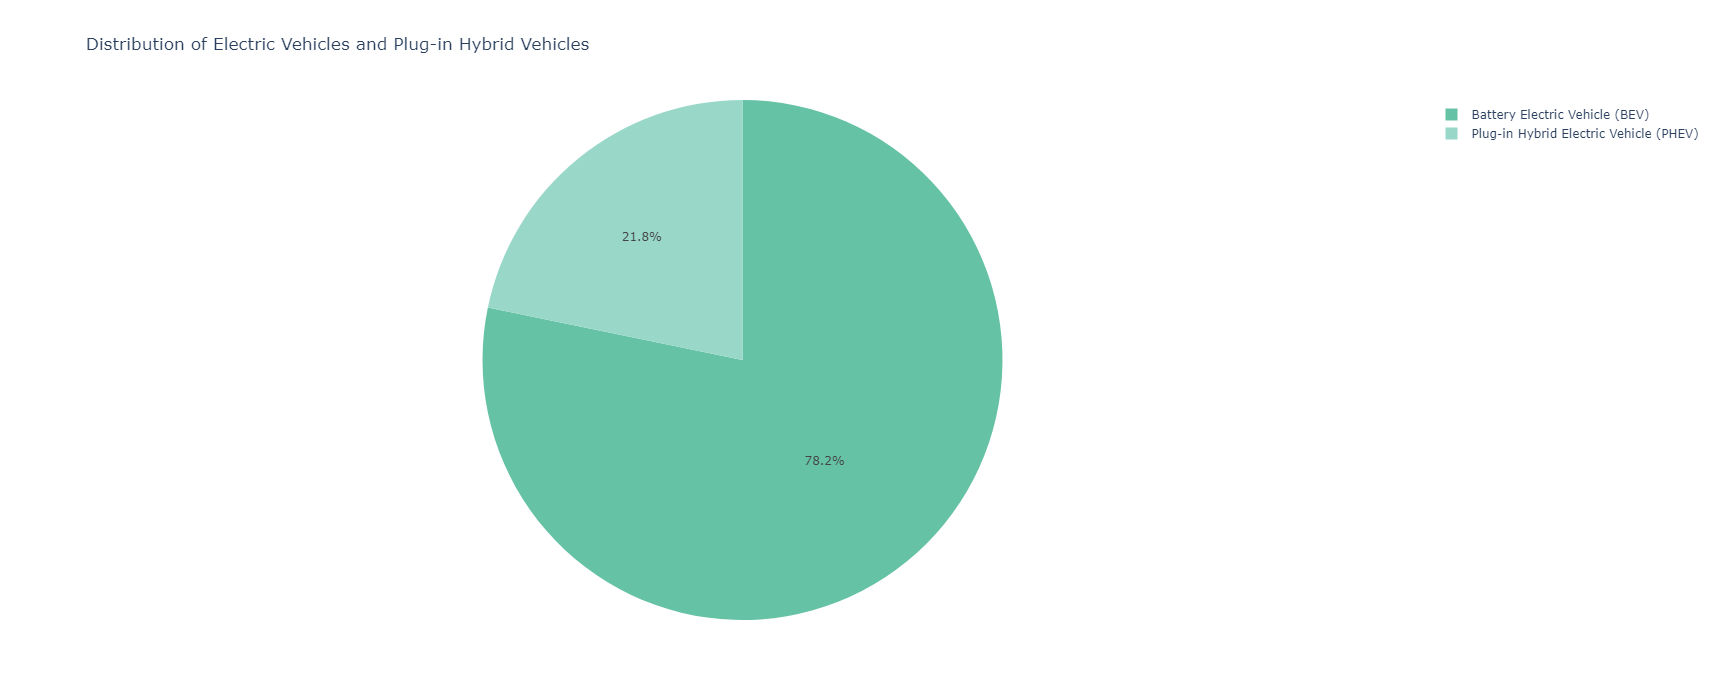

In [10]:
electric_vehicles_all = ev_data['Electric Vehicle Type'].value_counts().reset_index()
electric_vehicles_all.columns = ['Electric Vehicle Type', 'Count']

fig = px.pie(electric_vehicles_all, 
             names='Electric Vehicle Type', 
             values='Count', 
             title='Distribution of Electric Vehicles and Plug-in Hybrid Vehicles',
             color_discrete_sequence=['#66c2a5', '#99d8c9', '#e5f5f9'])

fig.update_layout(width=1000, height=700)

fig.show()

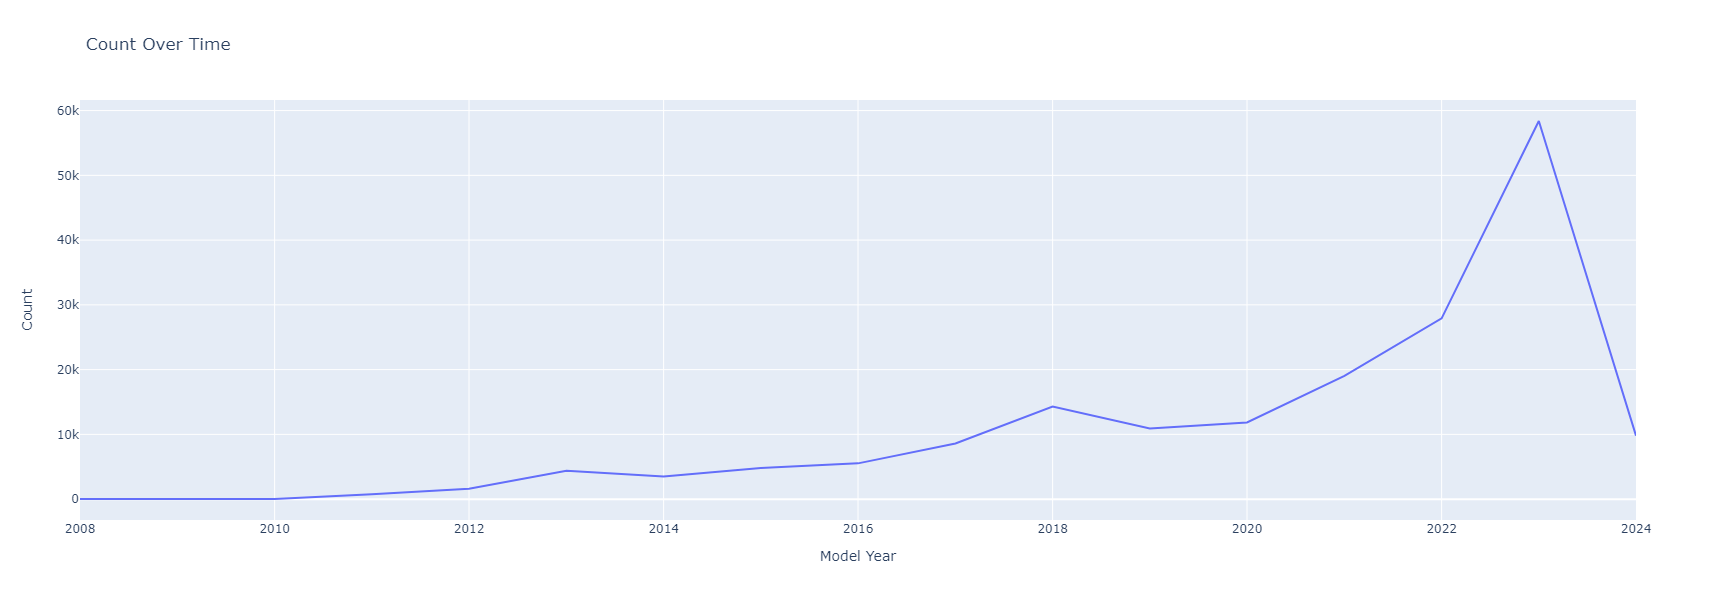

In [11]:
vehicle_sales_distribution_total = ev_data.groupby('Model Year').size().reset_index(name='Count')

vehicle_sales_distribution_filtered = vehicle_sales_distribution_total[vehicle_sales_distribution_total['Model Year'] >= 2008]

def plot_values_by_time(df, column_name):
    df1 = df.copy()
    df1['Model Year'] = pd.to_datetime(df1['Model Year'], format='%Y')
    
    fig = px.line(df1, x='Model Year', y=column_name, title=f'{column_name} Over Time', labels={'Model Year': 'Model Year', column_name: column_name})
    
    fig.update_layout(width=1000, height=600)
    
    fig.show()

plot_values_by_time(vehicle_sales_distribution_filtered, 'Count')

# איזה חברה מובילה בוושינגטון?

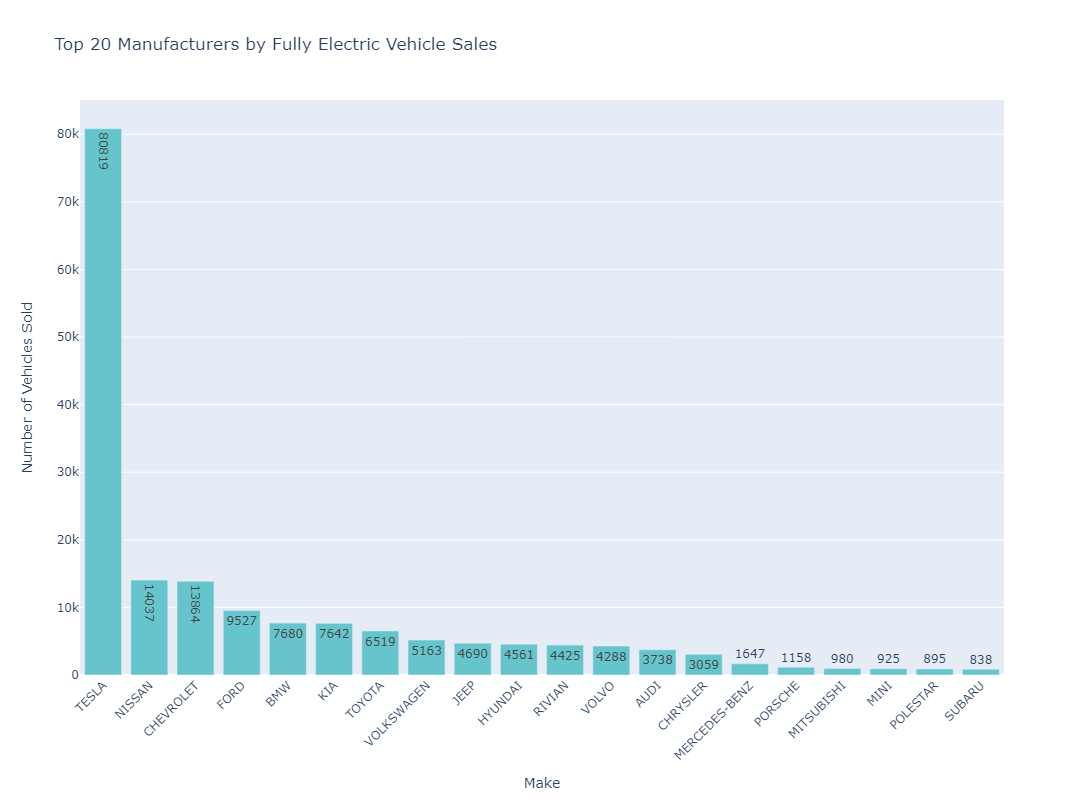

In [36]:
electric_vehicles = ev_data[ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

sales_by_make = ev_data.groupby('Make').size().sort_values(ascending=False).head(20)
data = pd.DataFrame({'Make': sales_by_make.index, 'Number of Vehicles Sold': sales_by_make.values})

fig = px.bar(data, x='Make', y='Number of Vehicles Sold', 
             title='Top 20 Manufacturers by Fully Electric Vehicle Sales', 
             labels={'Make': 'Make', 'Number of Vehicles Sold': 'Number of Vehicles Sold'},
             text='Number of Vehicles Sold',
             height=800, width=1000,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

we can see that most of the cars in Washington belong to TESLA

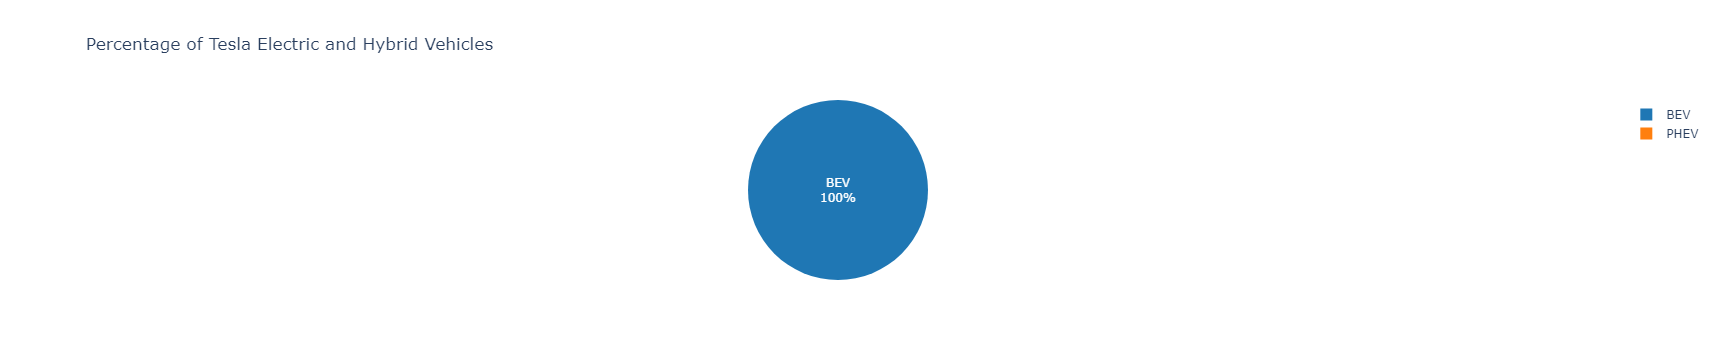

In [13]:
tesla_data = ev_data[ev_data['Make'] == 'TESLA']

tesla_bev_count = tesla_data[tesla_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].shape[0]
tesla_phev_count = tesla_data[tesla_data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]

data = {'Type': ['BEV', 'PHEV'], 'Count': [tesla_bev_count, tesla_phev_count]}
df = pd.DataFrame(data)

fig = px.pie(df, values='Count', names='Type', 
             title='Percentage of Tesla Electric and Hybrid Vehicles',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)

fig.show()

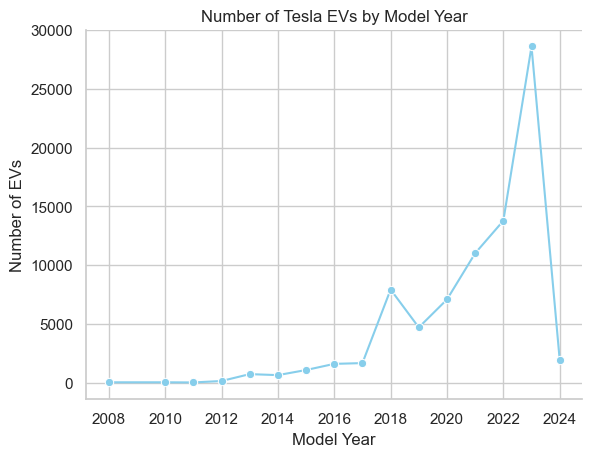

In [14]:
tesla_sales_by_year = tesla_data['Model Year'].value_counts().sort_index()

data = pd.DataFrame({'Model Year': tesla_sales_by_year.index, 'Number of EVs': tesla_sales_by_year.values})

sns.set(style="whitegrid")
ax = sns.lineplot(x='Model Year', y='Number of EVs', data=data, marker='o', color='skyblue')
ax.set_title('Number of Tesla EVs by Model Year')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)

sns.despine()

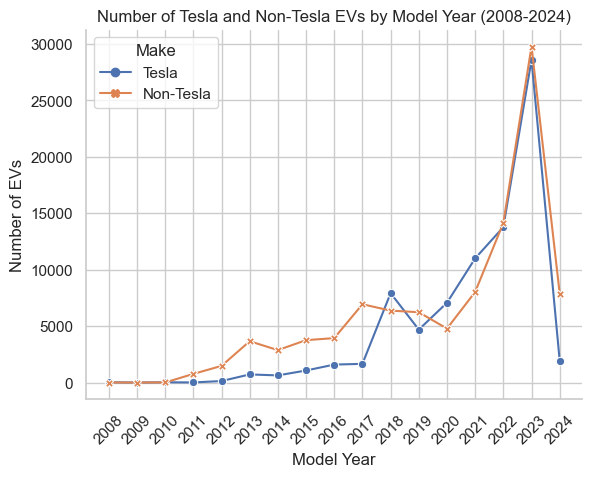

In [15]:
non_tesla_data = ev_data[ev_data['Make'] != 'TESLA']
tesla_sales_by_year = tesla_data['Model Year'].value_counts().sort_index()
non_tesla_sales_by_year = non_tesla_data['Model Year'].value_counts().sort_index()

years = list(range(2008, 2025))

tesla_sales_by_year = tesla_sales_by_year.reindex(years, fill_value=0)
non_tesla_sales_by_year = non_tesla_sales_by_year.reindex(years, fill_value=0)

data = pd.DataFrame({
    'Year': years,
    'Tesla': tesla_sales_by_year.values,
    'Non-Tesla': non_tesla_sales_by_year.values})

data_melted = data.melt('Year', var_name='Make', value_name='Number of EVs')

sns.set(style="whitegrid")
ax = sns.lineplot(x='Year', y='Number of EVs', hue='Make', style='Make', markers=True, dashes=False, data=data_melted)

ax.set_title('Number of Tesla and Non-Tesla EVs by Model Year (2008-2024)')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(title='Make')

sns.despine()

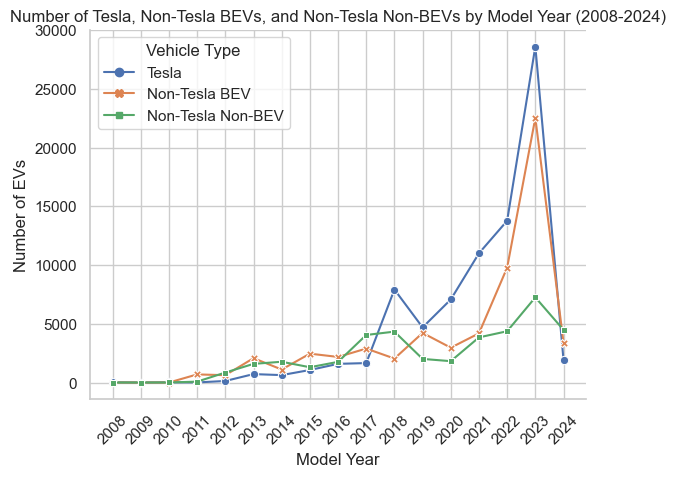

In [16]:
non_tesla_bev_data = ev_data[(ev_data['Make'] != 'TESLA') & (ev_data['Electric Vehicle Type'].str.contains('Battery Electric Vehicle', case=False, na=False))]
non_tesla_non_bev_data = ev_data[(ev_data['Make'] != 'TESLA') & (~ev_data['Electric Vehicle Type'].str.contains('Battery Electric Vehicle', case=False, na=False))]
non_tesla_bev_sales_by_year = non_tesla_bev_data['Model Year'].value_counts().sort_index()
non_tesla_non_bev_sales_by_year = non_tesla_non_bev_data['Model Year'].value_counts().sort_index()

tesla_sales_by_year = tesla_sales_by_year.reindex(years, fill_value=0)
non_tesla_bev_sales_by_year = non_tesla_bev_sales_by_year.reindex(years, fill_value=0)
non_tesla_non_bev_sales_by_year = non_tesla_non_bev_sales_by_year.reindex(years, fill_value=0)

data = pd.DataFrame({
    'Year': years,
    'Tesla': tesla_sales_by_year.values,
    'Non-Tesla BEV': non_tesla_bev_sales_by_year.values,
    'Non-Tesla Non-BEV': non_tesla_non_bev_sales_by_year.values})

data_melted = data.melt('Year', var_name='Vehicle Type', value_name='Number of EVs')

sns.set(style="whitegrid")
ax = sns.lineplot(x='Year', y='Number of EVs', hue='Vehicle Type', style='Vehicle Type', markers=True, dashes=False, data=data_melted)

ax.set_title('Number of Tesla, Non-Tesla BEVs, and Non-Tesla Non-BEVs by Model Year (2008-2024)')
ax.set_xlabel('Model Year')
ax.set_ylabel('Number of EVs')
ax.grid(True)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.legend(title='Vehicle Type')

sns.despine()

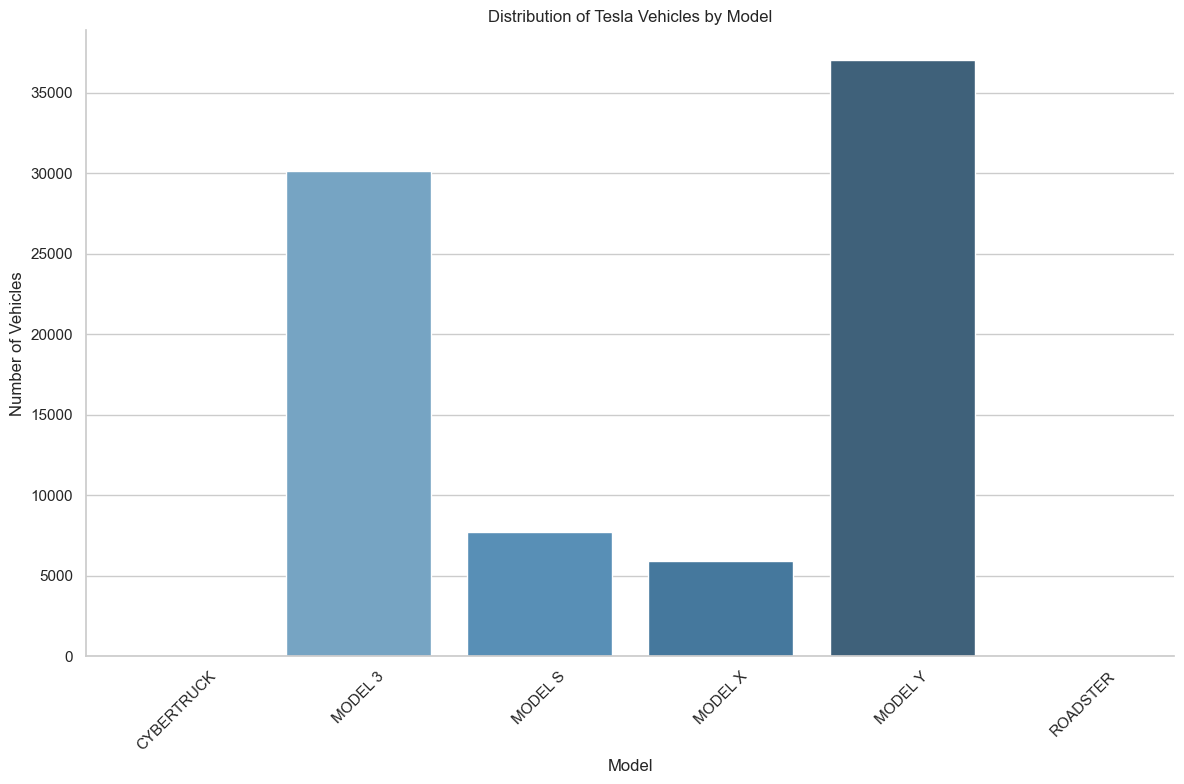

In [17]:
tesla_model_counts = tesla_data['Model'].value_counts().sort_index()

data = pd.DataFrame({'Model': tesla_model_counts.index, 'Number of Vehicles': tesla_model_counts.values})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # התאמת גודל הגרף
ax = sns.barplot(x='Model', y='Number of Vehicles', data=data, palette='Blues_d')

ax.set_title('Distribution of Tesla Vehicles by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Number of Vehicles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

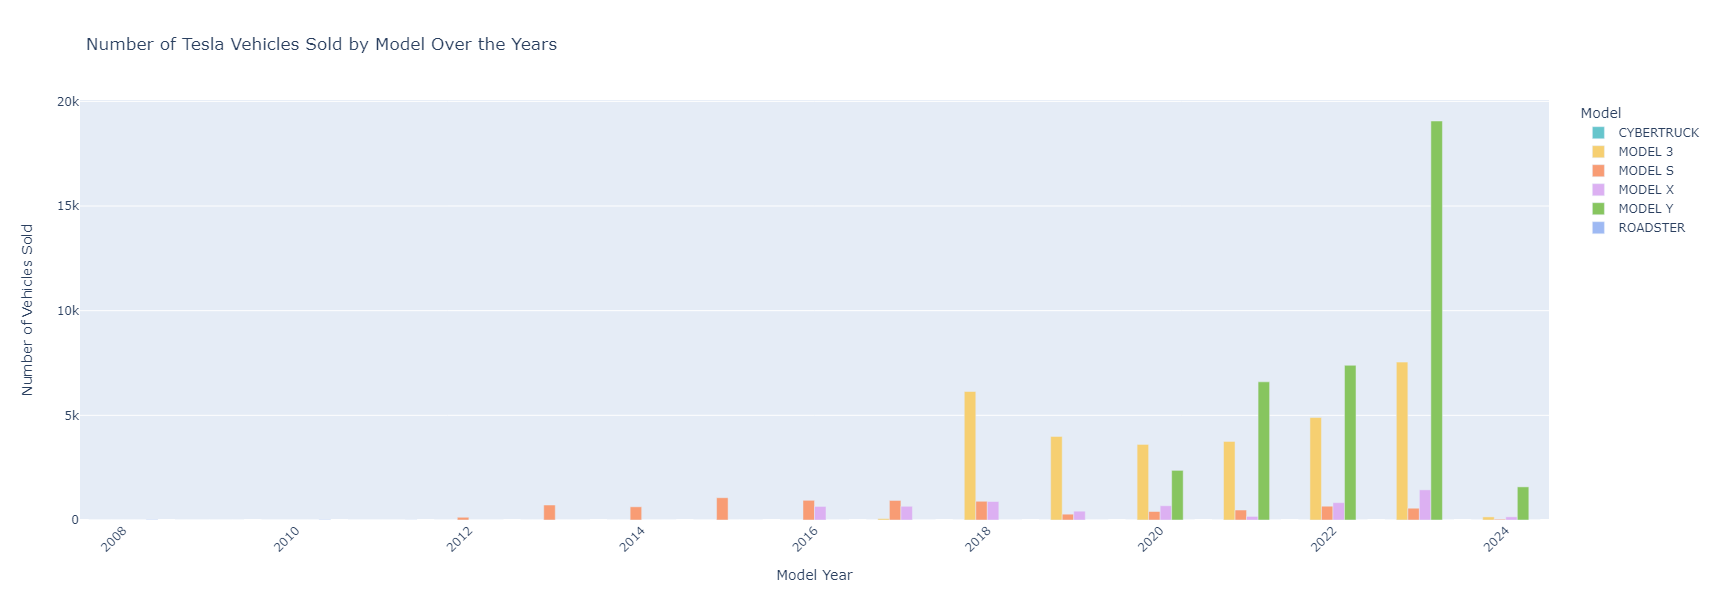

In [18]:
tesla_sales_by_year = tesla_data.groupby(['Model', 'Model Year']).size().unstack(fill_value=0)

all_years = pd.Series(range(2008, 2025))
tesla_sales_by_year = tesla_sales_by_year.reindex(columns=all_years, fill_value=0)

tesla_sales_by_year = tesla_sales_by_year.stack().reset_index(name='Number of Vehicles Sold')
tesla_sales_by_year.columns = ['Model', 'Model Year', 'Number of Vehicles Sold']

fig = px.bar(tesla_sales_by_year, x='Model Year', y='Number of Vehicles Sold', 
             color='Model', 
             title='Number of Tesla Vehicles Sold by Model Over the Years', 
             labels={'Model Year': 'Model Year', 'Number of Vehicles Sold': 'Number of Vehicles Sold'},
             height=600, width=1000,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             barmode='group')  # שינוי למצב group

fig.update_layout(xaxis_tickangle=-45)

fig.update_layout(legend_title_text='Model')

fig.show()

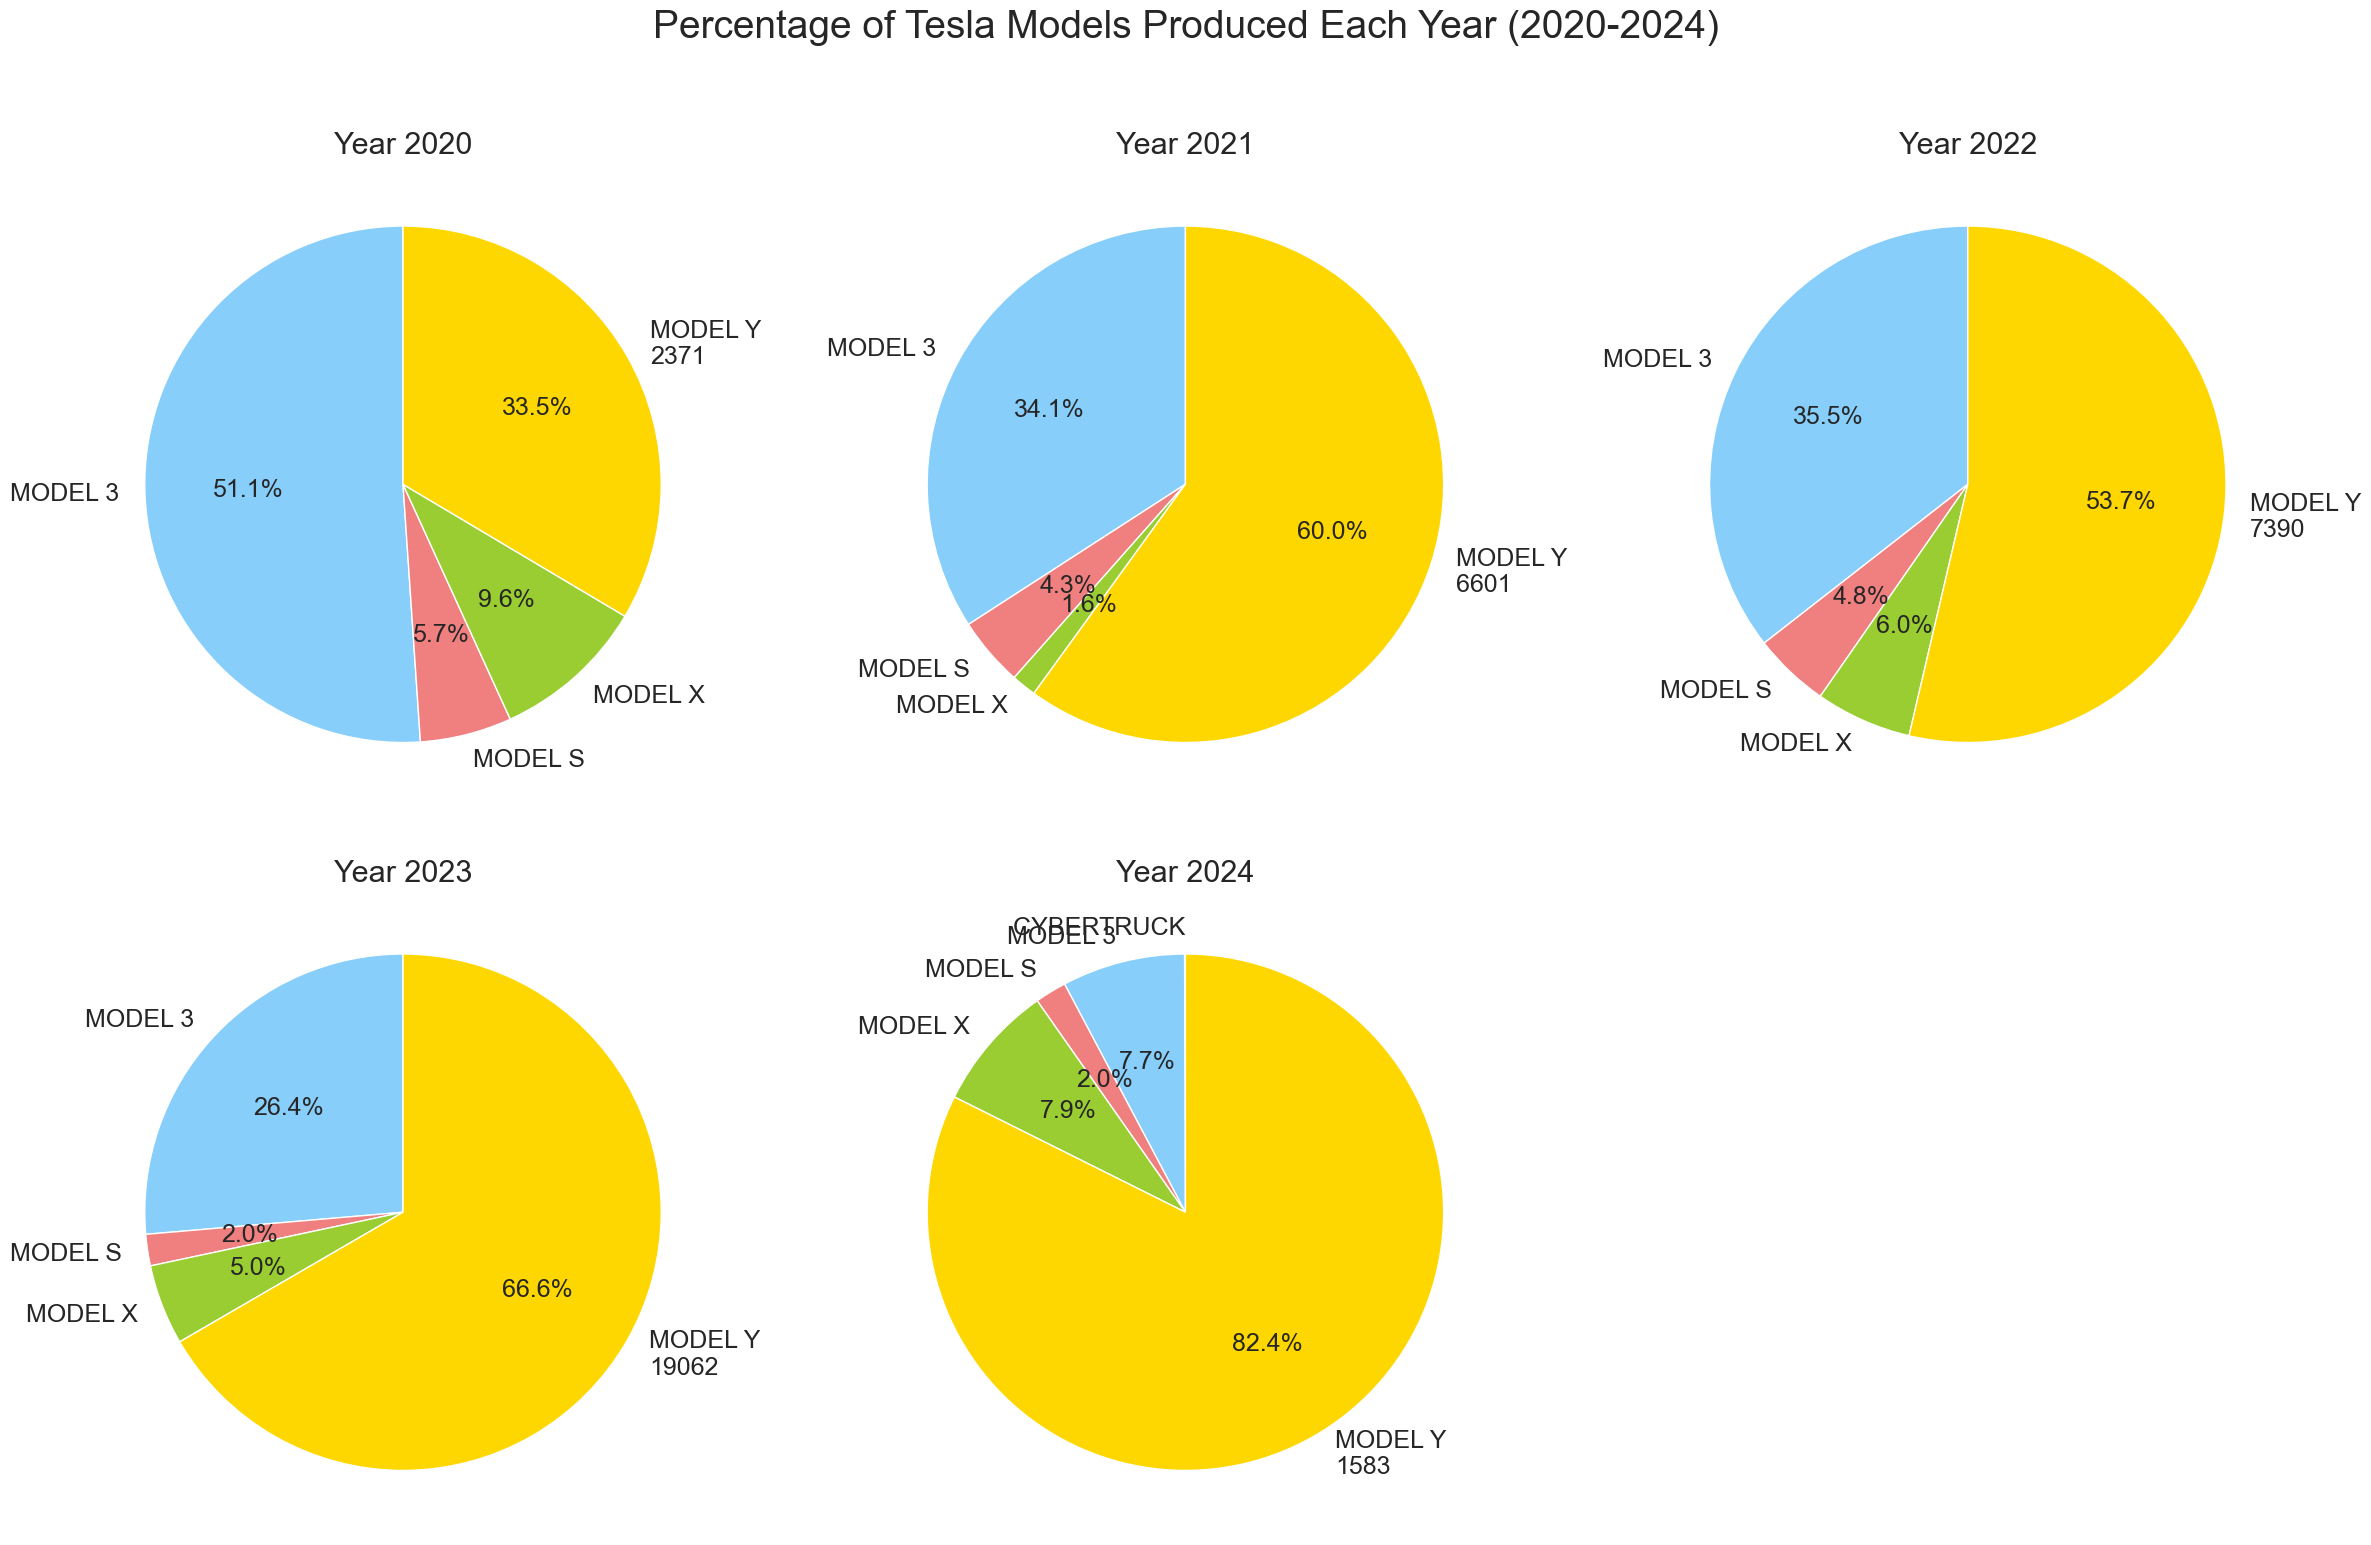

In [19]:
tesla_data = tesla_data[(tesla_data['Model Year'] >= 2020) & (tesla_data['Model Year'] <= 2024)]
tesla_sales_by_year_and_model = tesla_data.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)
tesla_sales_by_year_and_model_percentage = tesla_sales_by_year_and_model.div(tesla_sales_by_year_and_model.sum(axis=1), axis=0) * 100

tesla_sales_by_year_and_model_percentage = tesla_sales_by_year_and_model_percentage.stack().reset_index(name='Percentage')
tesla_sales_by_year_and_model_percentage.columns = ['Model Year', 'Model', 'Percentage']

model_colors = {
    'MODEL S': 'lightcoral',
    'MODEL 3': 'lightskyblue',
    'MODEL X': 'yellowgreen',
    'MODEL Y': 'gold',
    'CYBERTRUCK': 'lightpink',
    'ROADSTER': 'lightblue'}

# Plot pie charts for each year showing the percentage produced by each model
years = tesla_sales_by_year_and_model_percentage['Model Year'].unique()
num_years = len(years)
num_cols = 3
num_rows = (num_years // num_cols) + (1 if num_years % num_cols else 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, num_rows * 8))
fig.suptitle('Percentage of Tesla Models Produced Each Year (2020-2024)', fontsize=28)

for i, year in enumerate(years):
    row, col = divmod(i, num_cols)
    ax = axs[row, col] if num_rows > 1 else axs[col]
    data = tesla_sales_by_year_and_model_percentage[tesla_sales_by_year_and_model_percentage['Model Year'] == year]
    data = data[data['Percentage'] > 0]  # Filter out 0.0% values
    colors = [model_colors[model] for model in data['Model']]
    counts = tesla_sales_by_year_and_model.loc[year, data['Model']]
    labels = [f'{model}\n{int(count)}' if model == 'MODEL Y' else model for model, count in zip(data['Model'], counts)]
    if year == 2024:
        labels = [label if model != 'CYBERTRUCK' else ' ' + label for label, model in zip(labels, data['Model'])]  # Move the Cybertruck label
        wedges, texts, autotexts = ax.pie(data['Percentage'], labels=labels, autopct=lambda p: f'{p:.1f}%' if p > 0.1 else '', startangle=90, colors=colors)
    else:
        wedges, texts, autotexts = ax.pie(data['Percentage'], labels=labels, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=90, colors=colors)
    ax.set_title(f'Year {year}', fontsize=22)

    for text in texts:
        text.set_fontsize(18)
    for autotext in autotexts:
        autotext.set_fontsize(18)

for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    if num_rows > 1:
        fig.delaxes(axs[row, col])
    else:
        fig.delaxes(axs[col])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## : מסקנה ראשונה

### טסלה מובילה את שוק הרכבים החשמליים, במיוחד עם מודל Y.<br> אנו ממליצים לחברות לחקור את היתרונות וההצלחות של מודל זה וליישם את המסקנות במודלים הבאים שלהן.<br> כמו כן, חשוב לעקוב אחר מגמות השוק ולנתח את הנתונים כדי להבין את הביקוש וההעדפות של הלקוחות.

### ניתוח הגרפים מראה בבירור כי אחוז הרכבים החשמליים בוושינגטון גבוה בהרבה מזה של הרכבים ההיברידיים, דבר שמצביע על העדפה מסוימת של הצרכנים. מכאן, שאר החברות בשוק צריכות להשקיע ברכבים חשמליים על מנת להגדיל את המכירות שלהן.

### ההצלחה של טסלה מראה כי השקעה בטכנולוגיה מתקדמת ובחדשנות משתלמת בטווח הארוך. 



<a id='top'></a>
<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%94%D7%95%D7%A8%D7%93%D7%94.jpg?raw=true" width="500"/>
</div>

# באיזה מחוז יש את מספר הרכבים הגבוה ביותר?


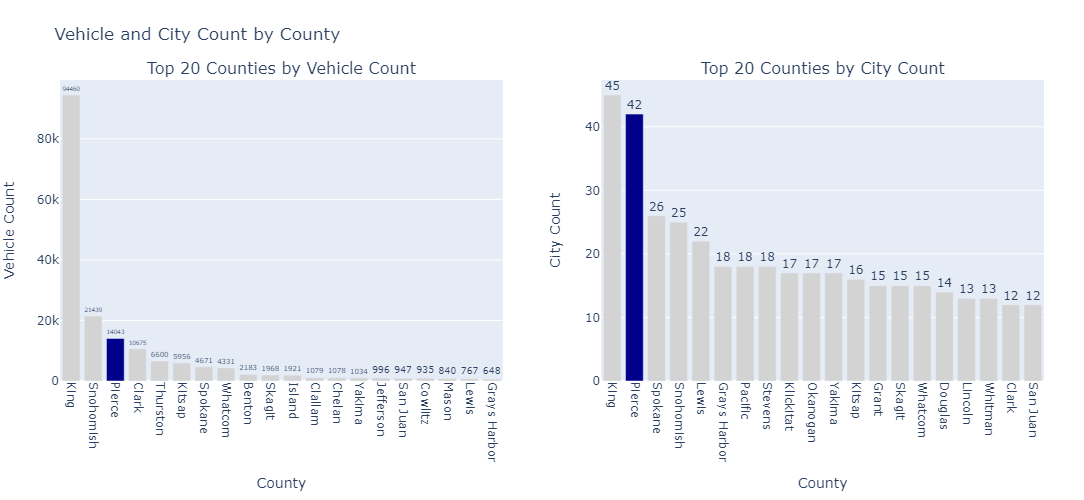

In [38]:
vehicle_count_by_county = ev_data.groupby('County').size().reset_index(name='Vehicle Count')

top_20_counties_by_vehicle_count = vehicle_count_by_county.nlargest(20, 'Vehicle Count')

city_count_by_county = ev_data.groupby('County')['City'].nunique().reset_index(name='City Count')

top_20_counties_by_city_count = city_count_by_county.nlargest(20, 'City Count')

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 20 Counties by Vehicle Count', 'Top 20 Counties by City Count'))

default_color = 'lightgray'
highlight_color = 'darkblue'

colors1 = [highlight_color if county == 'Pierce' else default_color for county in top_20_counties_by_vehicle_count['County']]
fig.add_trace(go.Bar(x=top_20_counties_by_vehicle_count['County'], y=top_20_counties_by_vehicle_count['Vehicle Count'], 
                     marker_color=colors1, text=top_20_counties_by_vehicle_count['Vehicle Count'], 
                     textposition='outside'), row=1, col=1)

colors2 = [highlight_color if county == 'Pierce' else default_color for county in top_20_counties_by_city_count['County']]
fig.add_trace(go.Bar(x=top_20_counties_by_city_count['County'], y=top_20_counties_by_city_count['City Count'], 
                     marker_color=colors2, text=top_20_counties_by_city_count['City Count'], 
                     textposition='outside'), row=1, col=2)

fig.update_layout(height=500, width=1100, title_text='Vehicle and City Count by County', showlegend=False,
                  margin=dict(l=40, r=40, t=80, b=80))

fig.update_xaxes(tickangle=90, title_text="County", row=1, col=1)
fig.update_yaxes(title_text="Vehicle Count", row=1, col=1)

fig.update_xaxes(tickangle=90, title_text="County", row=1, col=2)
fig.update_yaxes(title_text="City Count", row=1, col=2)

fig.show()

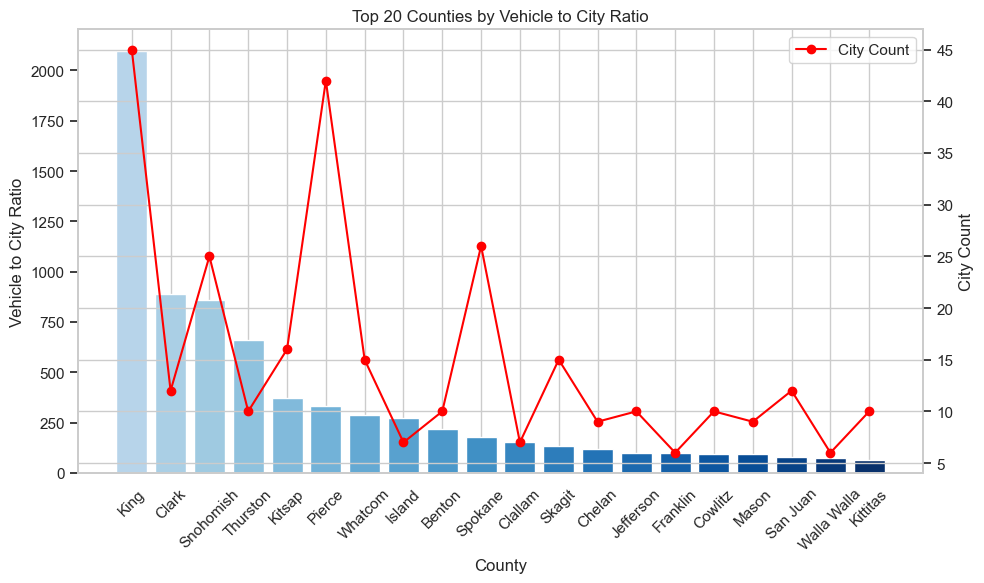

County  total_count  num_cities  percentage
79           King        94460          45   52.056123
125        Pierce        14043          42    7.738981
163       Spokane         4671          26    2.574149
160     Snohomish        21439          25   11.814855
92          Lewis          767          22    0.422687
61   Grays Harbor          648          18    0.357107
123       Pacific          209          18    0.115178
168       Stevens          223          18    0.122893
189        Yakima         1034          17    0.569829
83      Klickitat          294          17    0.162021
118      Okanogan          272          17    0.149897
81         Kitsap         5956          16    3.282302
158        Skagit         1968          15    1.084548
182       Whatcom         4331          15    2.386778
60          Grant          585          15    0.322389
46        Douglas          372          14    0.205006
93        Lincoln           52          13    0.028657
183       Whitman          341          13    0.187922
33          Clark        10675          12    5.882904
147      San Juan          947          12    0.521884

In [21]:
city_count_by_county = ev_data.groupby('County')['City'].nunique().reset_index(name='City Count')

merged_data = pd.merge(vehicle_count_by_county, city_count_by_county, on='County')

merged_data['Vehicle to City Ratio'] = merged_data['Vehicle Count'] / merged_data['City Count']

top_20_counties_by_ratio = merged_data.nlargest(20, 'Vehicle to City Ratio')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_20_counties_by_ratio['County'], top_20_counties_by_ratio['Vehicle to City Ratio'], color=plt.cm.Blues(np.linspace(0.3, 1, len(top_20_counties_by_ratio))))
ax1.set_xlabel('County')
ax1.set_ylabel('Vehicle to City Ratio')
ax1.set_title('Top 20 Counties by Vehicle to City Ratio')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

ax2 = ax1.twinx()
ax2.plot(top_20_counties_by_ratio['County'], top_20_counties_by_ratio['City Count'], color='red', marker='o', linestyle='-', label='City Count')
ax2.set_ylabel('City Count')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()  

county_stats = ev_data.groupby('County').agg(total_count=('County', 'size'), num_cities=('City', 'nunique')).reset_index()

total_vehicles = ev_data.shape[0]
county_stats['percentage'] = (county_stats['total_count'] / total_vehicles) * 100

top_20_counties = county_stats.sort_values(by='num_cities', ascending=False).head(20)
top_20_counties

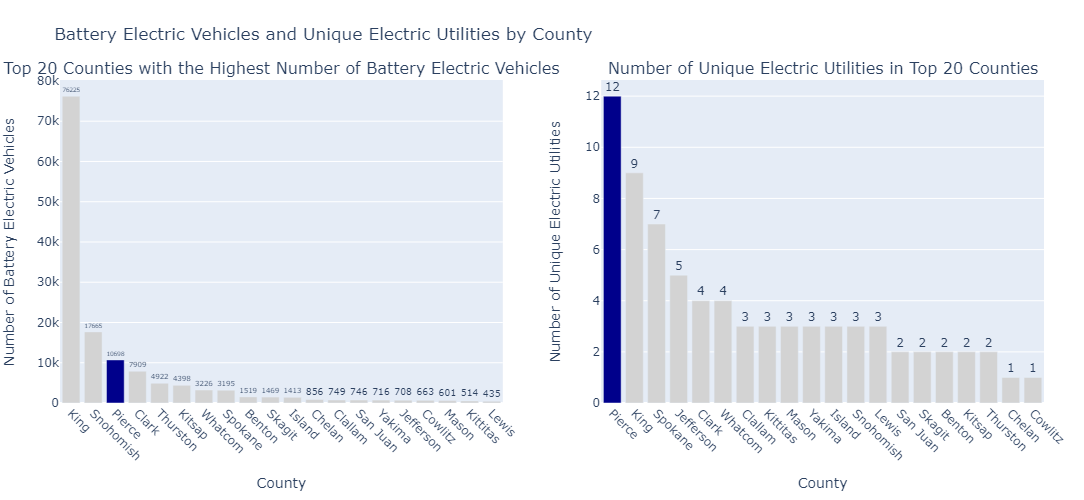

In [39]:
electric_vehicles = ev_data[ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

county_counts = electric_vehicles['County'].value_counts().reset_index(name='Vehicle Count')
county_counts.columns = ['County', 'Vehicle Count']

top_20_counties = county_counts.head(20)

electric_utility_counts = electric_vehicles[electric_vehicles['County'].isin(top_20_counties['County'])].groupby('County')['Electric Utility'].nunique().reset_index(name='Unique Electric Utility Count')

merged_counts = pd.merge(top_20_counties, electric_utility_counts, on='County')

data = {
    'County': merged_counts['County'],
    'Vehicle Count': merged_counts['Vehicle Count'],
    'Unique Electric Utility Count': merged_counts['Unique Electric Utility Count']}

df = pd.DataFrame(data)
df_sorted = df.sort_values('Unique Electric Utility Count', ascending=False)

default_color = 'lightgray'
highlight_color = 'darkblue'

colors1 = [highlight_color if county == 'Pierce' else default_color for county in df['County']]

colors2 = [highlight_color if county == 'Pierce' else default_color for county in df_sorted['County']]

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 20 Counties with the Highest Number of Battery Electric Vehicles', 'Number of Unique Electric Utilities in Top 20 Counties'))

fig.add_trace(go.Bar(x=df['County'], y=df['Vehicle Count'], marker_color=colors1, text=df['Vehicle Count'], textposition='outside'), row=1, col=1)

fig.add_trace(go.Bar(x=df_sorted['County'], y=df_sorted['Unique Electric Utility Count'], marker_color=colors2, text=df_sorted['Unique Electric Utility Count'], textposition='outside'), row=1, col=2)

fig.update_layout(height=500, width=1100, title_text='Battery Electric Vehicles and Unique Electric Utilities by County', showlegend=False, margin=dict(l=40, r=40, t=80, b=40))

fig.update_xaxes(tickangle=45, title_text="County", row=1, col=1)
fig.update_yaxes(title_text="Number of Battery Electric Vehicles", row=1, col=1)

fig.update_xaxes(tickangle=45, title_text="County", row=1, col=2)
fig.update_yaxes(title_text="Number of Unique Electric Utilities", row=1, col=2)

fig.show()

### ניתן לראות כי במחוז פירס יש מספר קטן של רכבים חשמליים, אך מספר גבוה של ספקי חשמל שונים. לעומת זאת, במחוז קינג יש מספר גדול של רכבים חשמליים ומספר קטן יותר של ספקי חשמל.

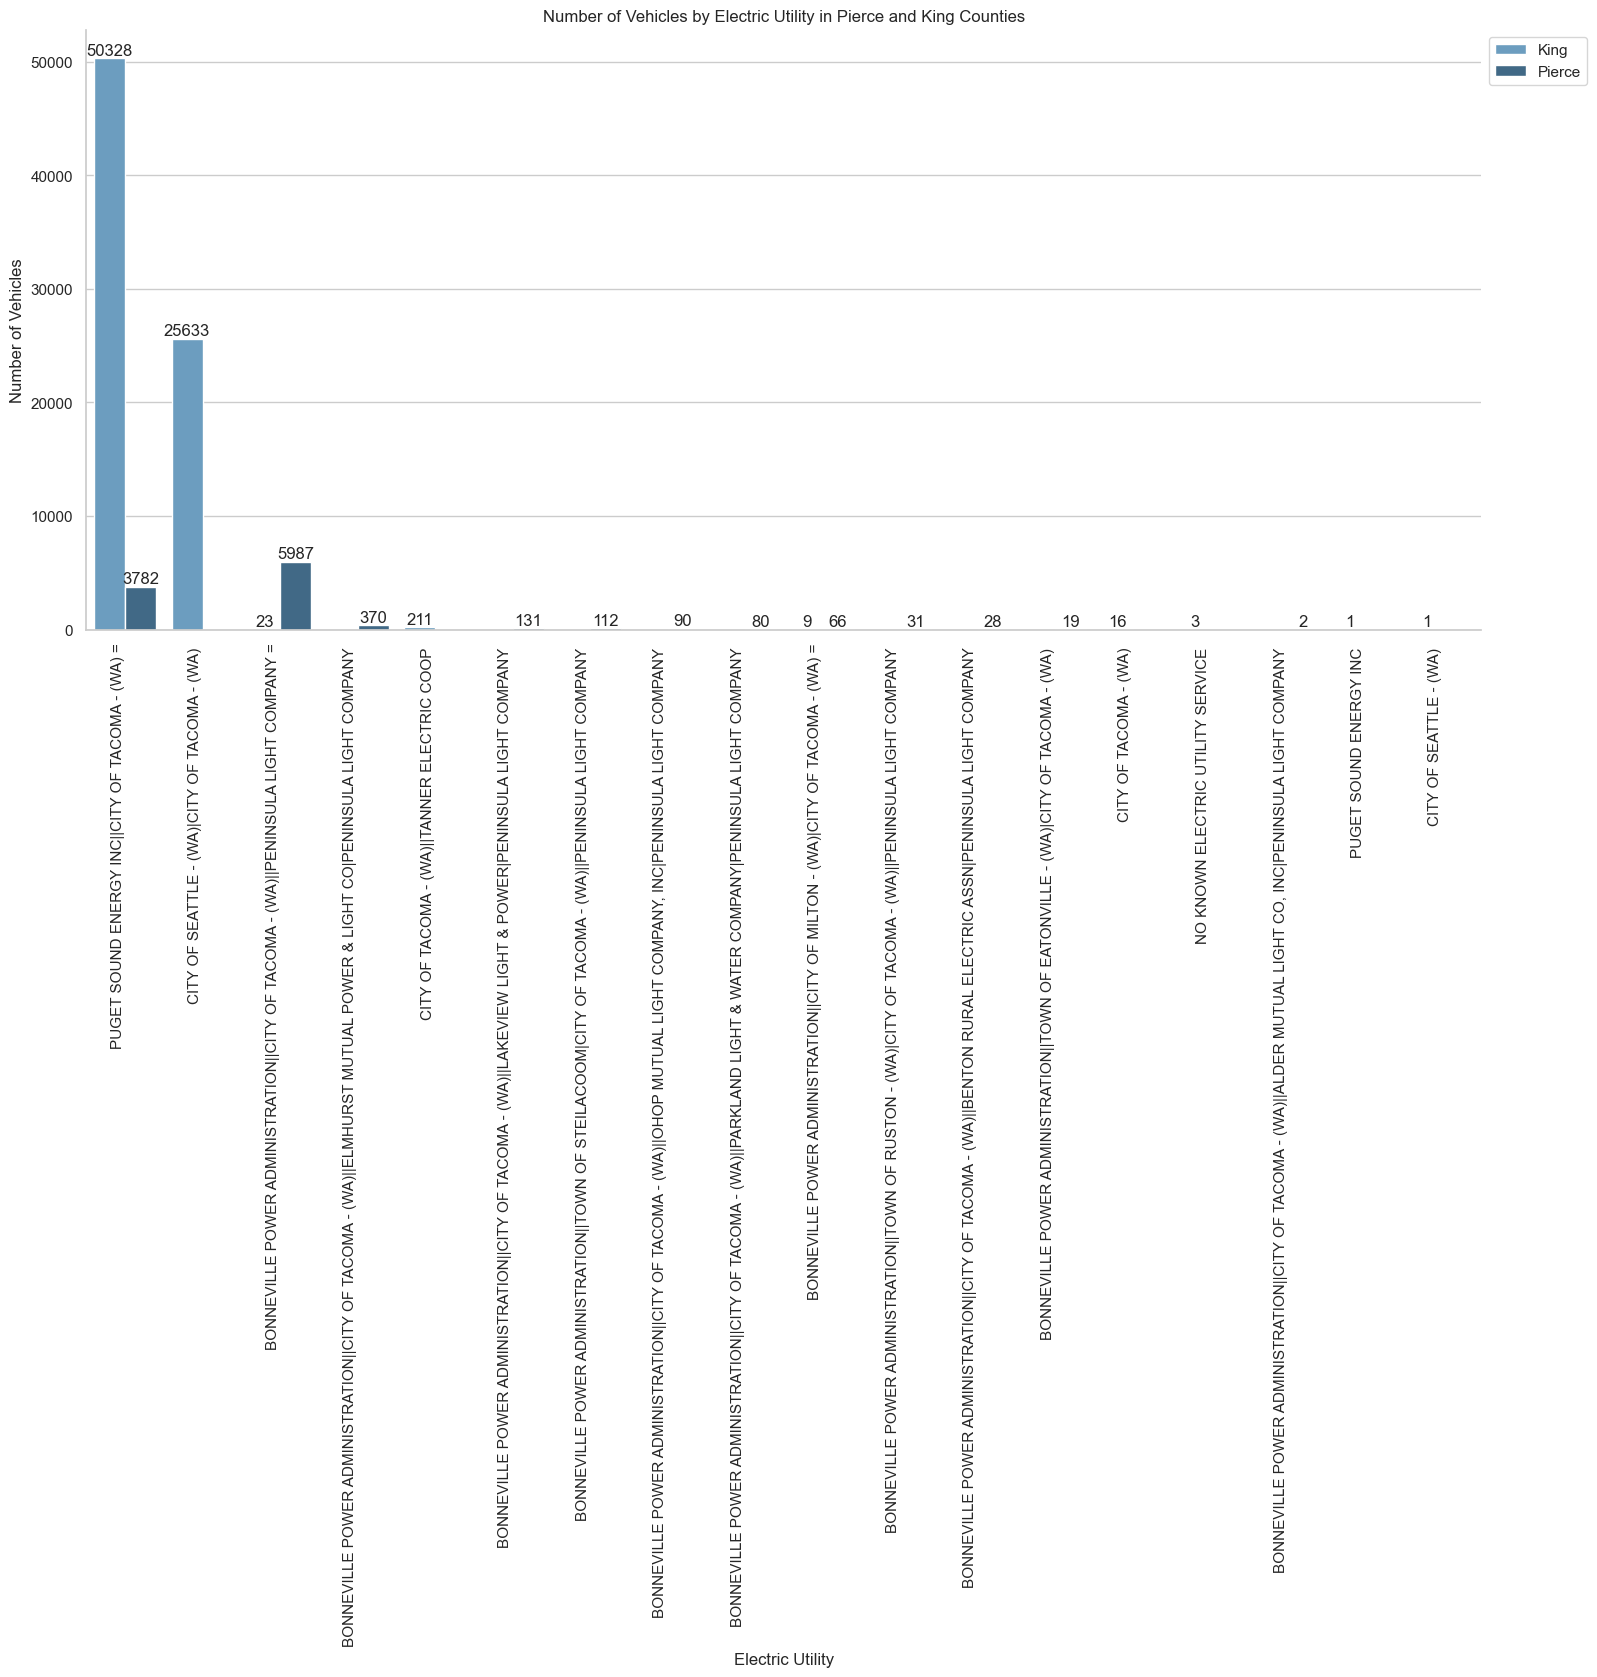

In [23]:
selected_counties = ['Pierce', 'King']
selected_electric_vehicles = ev_data[
    (ev_data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') &
    (ev_data['County'].isin(selected_counties))]

utility_counts = selected_electric_vehicles.groupby(['County', 'Electric Utility']).size().reset_index(name='Vehicle Count')

pierce_utilities = utility_counts[utility_counts['County'] == 'Pierce']['Electric Utility'].unique()
king_utilities = utility_counts[utility_counts['County'] == 'King']['Electric Utility'].unique()
common_utilities = set(pierce_utilities).intersection(set(king_utilities))

utility_counts['Common'] = utility_counts['Electric Utility'].apply(lambda x: '=' if x in common_utilities else '')
utility_counts['Utility Label'] = utility_counts.apply(lambda row: f"{row['Electric Utility']} {row['Common']}", axis=1)
utility_counts = utility_counts.sort_values(by='Vehicle Count', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='Utility Label', y='Vehicle Count', hue='County', data=utility_counts, palette='Blues_d')

ax.set_xlabel('Electric Utility')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles by Electric Utility in Pierce and King Counties')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.subplots_adjust(bottom=0.3, top=0.9)
plt.show()

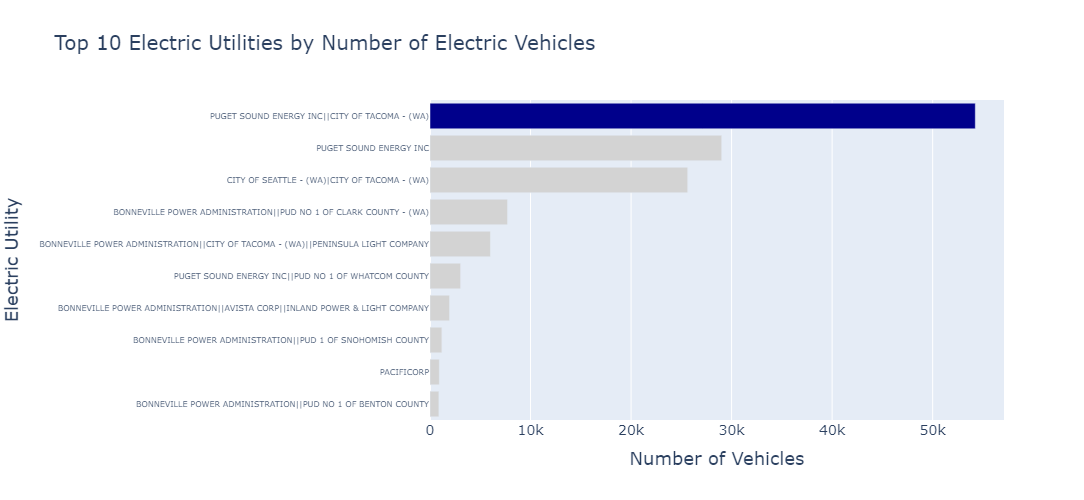

In [56]:
utility_counts = electric_vehicles['Electric Utility'].value_counts().head(10)

data = pd.DataFrame({'Electric Utility': utility_counts.index, 'Number of Vehicles': utility_counts.values})

data = data.sort_values(by='Number of Vehicles', ascending=True)

colors = ['lightgray'] * len(data)
colors[-1] = 'darkblue'  # הדגשת העמודה הגדולה ביותר

fig = px.bar(data, x='Number of Vehicles', y='Electric Utility', 
             title='Top 10 Electric Utilities by Number of Electric Vehicles', 
             labels={'Number of Vehicles': 'Number of Vehicles', 'Electric Utility': 'Electric Utility'},
             orientation='h')

fig.update_traces(marker_color=colors)

fig.update_layout(width=1400, height=500, 
                  title_font_size=20, 
                  xaxis_title_font_size=18, 
                  yaxis_title_font_size=18, 
                  xaxis_tickfont_size=14, 
                  yaxis_tickfont_size=8)

fig.show()

## מסקנה שנייה: 

### בגרף המוצג ניתן לראות את ספקי החשמל במחוזות קינג ופירס. מצאנו שיש רק שלוש חברות שמשותפות לשני המחוזות. החברה בה יש את מספר הרכבים החשמליים הגבוה ביותר היא חברת פוג'ט. ראינו גם שחברה זו היא החברה המובילה ככלל בשוק.

### מכך, אנחנו מסיקים שחברה עם מספר גבוה של רכבים חשמליים המשתמשים בשירותיה היא ככל הנראה חברה המציעה תמריצים גבוהים ומחירים נוחים. על כן, אנו ממליצים שמחוז פירס יגדיל את השימוש בספק זה ספציפי. במידה ומחוז פירס יעשה זאת, הוא יוכל להגדיל את מספר הרכבים החשמליים במחוזו.


In [25]:
# טען את הקובץ מהכתובת שציינת
url = 'https://raw.githubusercontent.com/morzadik/morzadik/main/ofm_april1_population_final%20%D7%90%D7%97%D7%A8%D7%95%D7%9F%202023.csv'
data = pd.read_csv(url)

## סידור הדאטא: 

In [26]:
# מסיר את השורות שיש בהן ערכים חסרים בעמודת "הערכת אוכלוסייה לשנת 2023"
population_data = data.dropna(subset=['2023 Population Estimate']).copy()

# ממיר את העמודה "הערכת אוכלוסייה לשנת 2023" לערכים נומריים
population_data.loc[:, '2023 Population Estimate'] = pd.to_numeric(population_data['2023 Population Estimate'].str.replace(',', ''), errors='coerce')

In [27]:
population_data

County                         city 2020 Population Census  \
0     Adams                 Adams County                 20,613   
1     Adams  Unincorporated Adams County                  9,472   
2     Adams    Incorporated Adams County                 11,141   
3     Adams                       Hatton                     79   
4     Adams                         Lind                    535   
..      ...                          ...                    ...   
439  Yakima                    Toppenish                  8,854   
440  Yakima                    Union Gap                  6,568   
441  Yakima                       Wapato                  4,607   
442  Yakima                       Yakima                 96,968   
443  Yakima                       Zillah                  3,179   

    2021 Population Estimate¹ 2022 Population Estimate  \
0                      20,900                   21,100   
1                       9,575                    9,575   
2                      11,325                   11,525   
3                          80                       80   
4                         535                      535   
..                        ...                      ...   
439                     8,870                    8,870   
440                     6,595                    6,640   
441                     4,610                    4,615   
442                    97,810                   98,200   
443                     3,190                    3,195   

    2023 Population Estimate  
0                    21200.0  
1                     9585.0  
2                    11615.0  
3                       80.0  
4                      535.0  
..                       ...  
439                   8900.0  
440                   6660.0  
441                   4620.0  
442                  98650.0  
443                   3215.0  

[444 rows x 6 columns]

הדטא שלנו היית המסודרת ברובה חוץ משתי עמודות ריקות שבהם טיפלנו.

הנתונים בקובץ מכילים הערכות אוכלוסייה עבור מחוזות וערים שונות משנת 2020 עד 2023. אנחנו השתמשנו על פי הנתונים של שנת 2023.


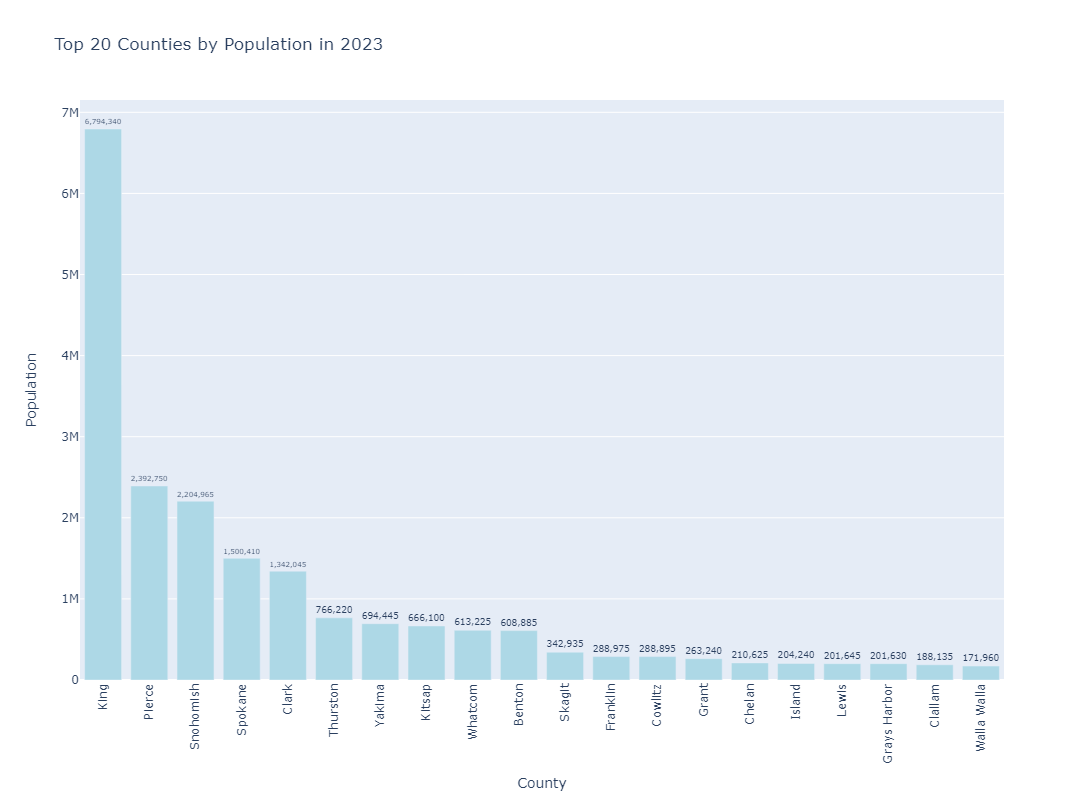

In [44]:
county_population_2023 = population_data.groupby('County')['2023 Population Estimate'].sum().reset_index()

top_20_counties = county_population_2023.sort_values(by='2023 Population Estimate', ascending=False).head(20)

fig = px.bar(top_20_counties, x='County', y='2023 Population Estimate', 
             title='Top 20 Counties by Population in 2023', 
             labels={'2023 Population Estimate': 'Population', 'County': 'County'},
             text=top_20_counties['2023 Population Estimate'])

fig.update_layout(width=1100, height=800)

fig.update_traces(marker_color='lightblue')

fig.update_layout(xaxis_tickangle=-90)

fig.update_traces(texttemplate='%{text:,}', textposition='outside')

fig.show()

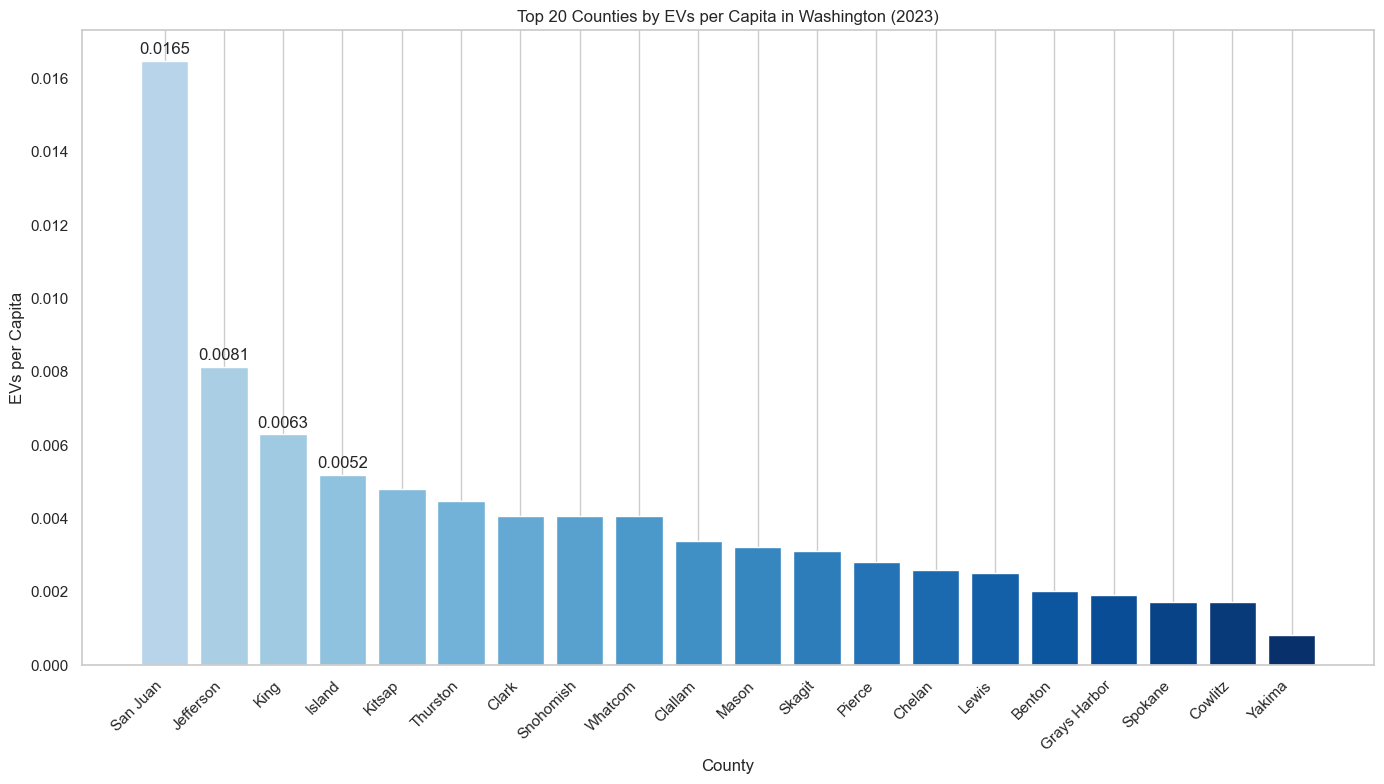

In [29]:
bev_data_0 = ev_data[(ev_data['Electric Vehicle Type'].str.contains('Electric')) & (ev_data['Electric Range'] > 0)]

population_by_county_2023 = population_data.groupby('County')['2023 Population Estimate'].sum().reset_index()

ev_by_county = bev_data_0.groupby('County').size().reset_index(name='EV Count')

merged_data_ev = pd.merge(population_by_county_2023, ev_by_county, how='left', on='County')

top_20_ev_counties = merged_data_ev.nlargest(20, 'EV Count')

top_20_ev_counties['EVs_per_capita'] = top_20_ev_counties['EV Count'] / top_20_ev_counties['2023 Population Estimate']

top_20_ev_counties = top_20_ev_counties.sort_values(by='EVs_per_capita', ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_20_ev_counties['County'], top_20_ev_counties['EVs_per_capita'], color=plt.cm.Blues(np.linspace(0.3, 1, len(top_20_ev_counties))))

for i, bar in enumerate(bars):
    if i < 4:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom')

ax.set_title('Top 20 Counties by EVs per Capita in Washington (2023)')
ax.set_xlabel('County')
ax.set_ylabel('EVs per Capita')
ax.set_xticks(range(len(top_20_ev_counties)))
ax.set_xticklabels(top_20_ev_counties['County'], rotation=45, ha='right')
ax.grid(axis='y')

plt.tight_layout()
plt.show()

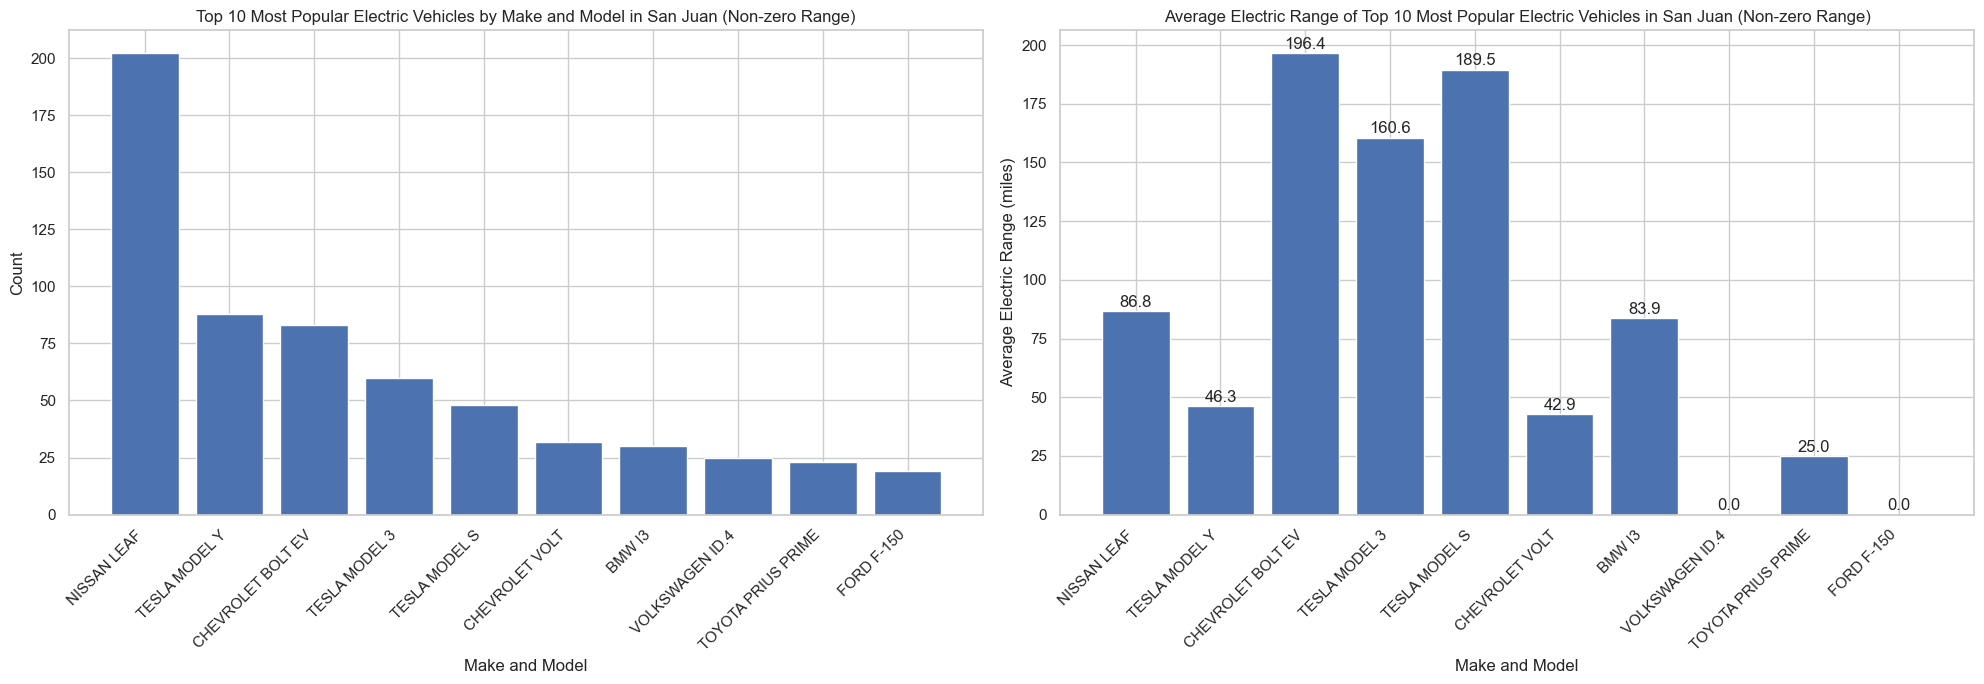

In [30]:
san_juan_data = ev_data[ev_data['County'] == 'San Juan']

make_model_avg_range =san_juan_data.groupby(['Make', 'Model']).agg({'Electric Range': 'mean', 'VIN (1-10)': 'size'}).reset_index()
make_model_avg_range.columns = ['Make', 'Model', 'Average Electric Range', 'Count']

make_model_sorted = make_model_avg_range.sort_values(by='Count', ascending=False)

top_make_model = make_model_sorted.head(10)

make_model_count_electric = san_juan_data.groupby(['Make', 'Model']).size().reset_index(name='Count')

make_model_count_sorted_electric = make_model_count_electric.sort_values(by='Count', ascending=False)

top_make_model_electric = make_model_count_sorted_electric.head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

bars1 = ax1.bar(top_make_model_electric['Make'] + ' ' + top_make_model_electric['Model'], top_make_model_electric['Count'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Make and Model')
ax1.set_title('Top 10 Most Popular Electric Vehicles by Make and Model in San Juan (Non-zero Range)')
ax1.set_xticks(range(len(top_make_model_electric)))
ax1.set_xticklabels(top_make_model_electric['Make'] + ' ' + top_make_model_electric['Model'], rotation=45, ha='right')

bars2 = ax2.bar(top_make_model['Make'] + ' ' + top_make_model['Model'], top_make_model['Average Electric Range'])
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom')
ax2.set_ylabel('Average Electric Range (miles)')
ax2.set_xlabel('Make and Model')
ax2.set_title('Average Electric Range of Top 10 Most Popular Electric Vehicles in San Juan (Non-zero Range)')
ax2.set_xticks(range(len(top_make_model)))
ax2.set_xticklabels(top_make_model['Make'] + ' ' + top_make_model['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

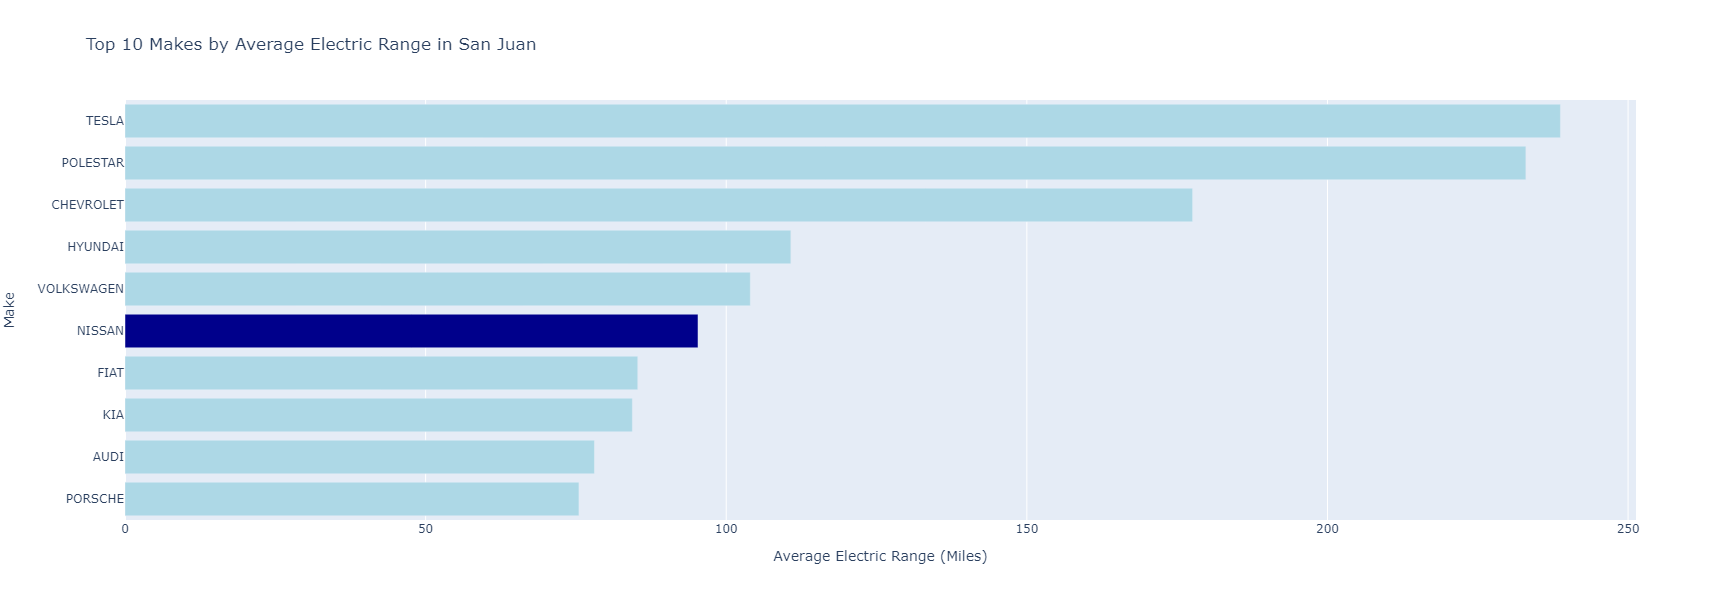

In [33]:
san_juan_nonzero_range = san_juan_data[san_juan_data['Electric Range'] > 0]

make_avg_range = san_juan_nonzero_range.groupby('Make')['Electric Range'].mean().reset_index()
make_avg_range_sorted = make_avg_range.sort_values(by='Electric Range', ascending=False).head(10)

fig = px.bar(make_avg_range_sorted, 
             x='Electric Range', 
             y='Make', 
             orientation='h', 
             title='Top 10 Makes by Average Electric Range in San Juan', 
             labels={'Electric Range': 'Average Electric Range (Miles)', 'Make': 'Make'})

colors = ['lightblue' if make != 'NISSAN' else 'darkblue' for make in make_avg_range_sorted['Make']]
fig.update_traces(marker_color=colors)

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.update_layout(width=1000, height=600)

fig.show()

In [32]:
san_juan_population = population_data[population_data['County'] == 'San Juan']
san_juan_total_population_2023 = san_juan_population['2023 Population Estimate'].iloc[0]
print("The number of people in San Juan County is:")
san_juan_total_population_2023

The number of people in San Juan County is:


18350.0

<a id='top'></a>
<div>
<img src="https://github.com/morzadik/morzadik/blob/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-24%20153136%202.jpg?raw=true" width="1000"/>
</div>

## מסקנה שלישית:

### אנחנו מסיקים כי רכבים עם טווח חשמלי גבוה ככל הנראה עולים יותר. 

### ה-ניסאן ליף הוא הרכב הנפוץ ביותר במחוז סאן חואן, עם טווח חשמלי ממוצע של כ-95.3 מיילים. נתון זה הופך אותו לבחירה מוצלחת לתושבים המחפשים רכב בעל מחיר נוח עם טווח חשמלי ממוצע.

### מחוז סאן חואן, בהיותו קטן הן מבחינת גודל האוכלוסייה והן מבחינת השטח, מאפיינים אלה מסבירים את הצורך המופחת שלהם בטווח חשמלי גבוה